## Utilizando Pipelines no SkLearn
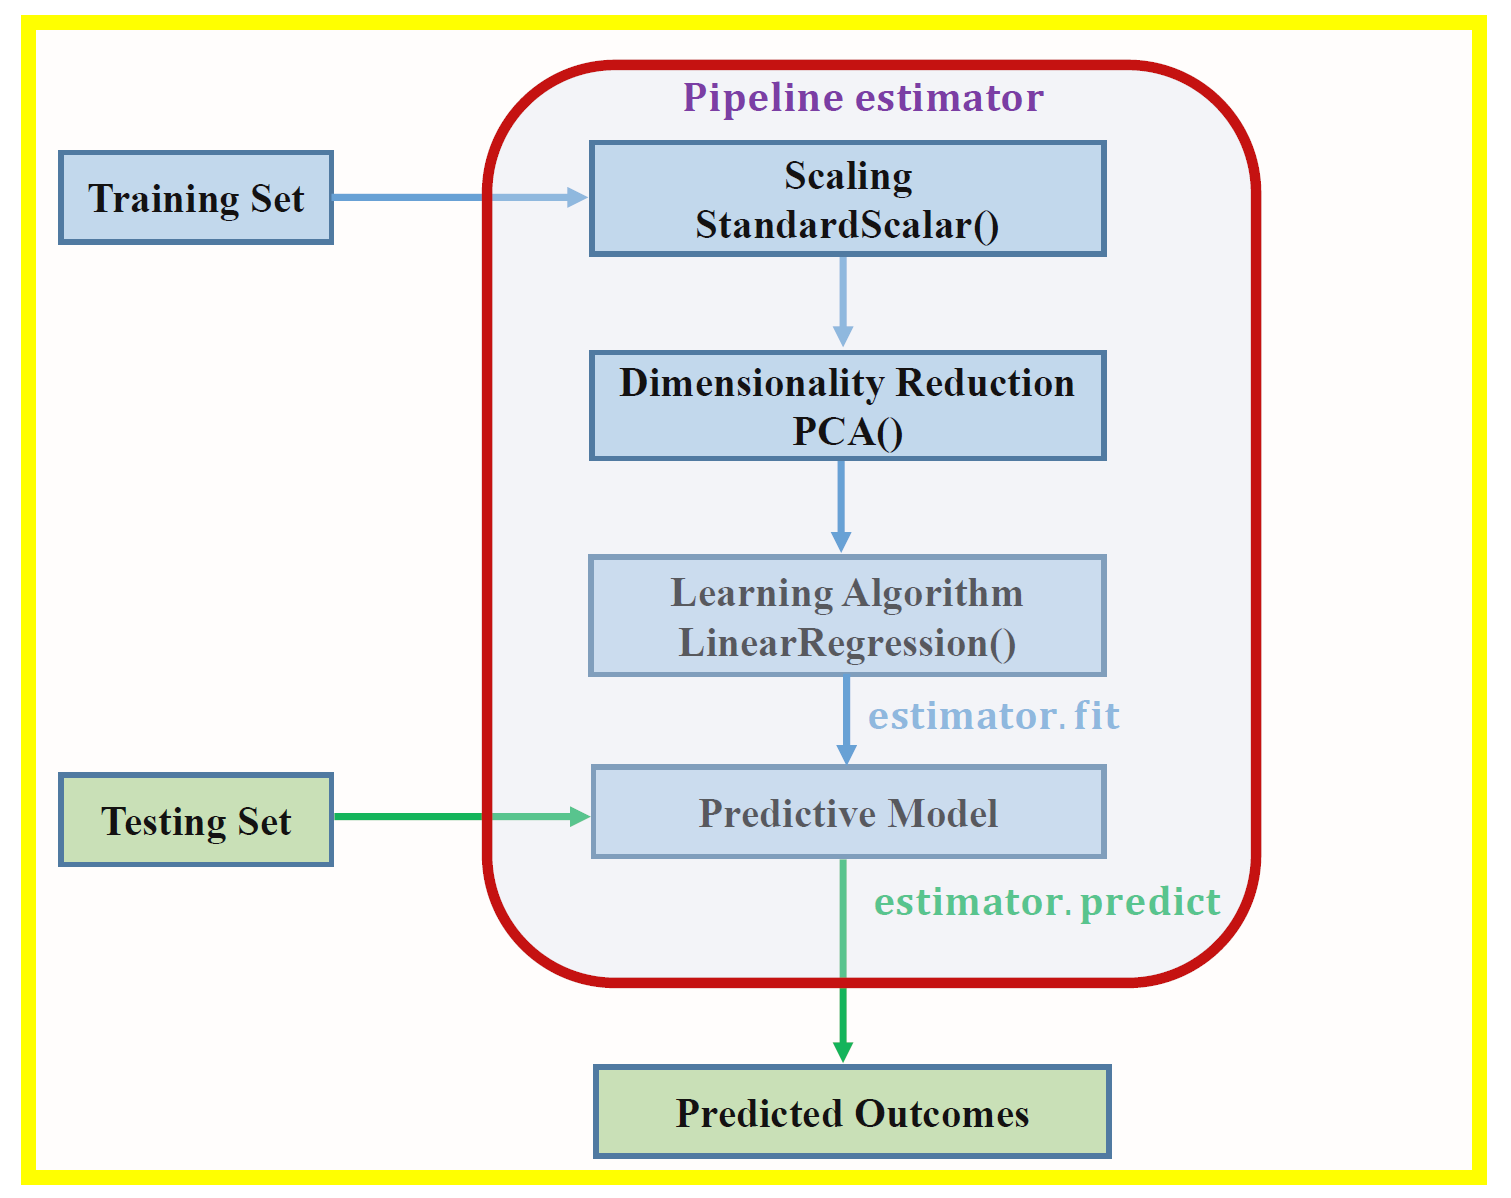
crédito: https://github.com/krishnaik06/Pipelines-Using-Sklearn


In [ ]:
# import das bibliotecas que serão utilizadas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Carga dos dados do Iris DataSet
iris_df=load_iris()

In [ ]:
# Dados carregados
iris_df.data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(iris_df.data,iris_df.target,test_size=0.3,random_state=0)

## Criação Pipeline
### 1. Normalização dos dados usando o Standard Scaler
### 2. Redução de Dimensionalidade usando PCA
### 3. Applicação dos Modelos Preditivos

In [ ]:
# Regressão Logística
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
# Árvore de Decisão
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [ ]:
# Random Forest
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier(random_state=0))])

In [ ]:
## Lista com os diferentes Pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [ ]:
# inicialização dos dados
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dicionário com os pipelines para facilitar o controle
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Execução do FIT - roda os pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
# resultados
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

### Salvando o modelo com o Pickle - Logistic Regression

In [ ]:
import pickle
arquivo = 'pipeline_lr.pkl'
pickle.dump(pipeline_lr, open(arquivo, 'wb'))

In [ ]:
# load the model from disk
lr_pickle = pickle.load(open('pipeline_lr.pkl', 'rb'))

### Salvando o modelo com o joblib - Decision Tree

In [ ]:
import joblib
from joblib import dump, load
dump(pipeline_dt, 'pipeline_dt.joblib') 

In [ ]:
dt_joblib = joblib.load('pipeline_dt.joblib')

### Nova execução dos pipelines

In [ ]:
## Lista agora com os Pipelines que foram salvados em disco
pipelines = [lr_pickle, dt_joblib, pipeline_randomforest]
# inicialização dos dados
best_accuracy=0.0
best_classifier=0
best_pipeline=""
# Dicionário com os pipelines para facilitar o controle
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Execução do FIT - roda os pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    # resultados
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))